In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('titanic_grupo2.csv')

df.head()
df.drop("Unnamed: 0", axis=1, inplace=True)

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Faixa Etarira
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,"(15, 25]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,"(25, 60]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,"(25, 60]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,"(25, 60]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,"(25, 60]"


# MODELAGEM

- Testar modelos
- Avaliar modelos

kNN - k-Nearest Neighbors

In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [5]:
variaveis_que_nao_vamos_usar = ['Name', 'Ticket']

df_limpo = df.drop(variaveis_que_nao_vamos_usar, axis=1)

In [6]:
df_limpo

# tratar sexo

# df['Sex'].apply(lambda x: 1 if x == 'male' else 0)

def trata_genero(genero):

    return 1 if genero == 'male' else 0


df_limpo['Sex'] = df_limpo['Sex'].apply(trata_genero)

In [7]:
def trata_embarked(embarked):

    if embarked == 'S':
        return 1
    return 2 if embarked == 'C' else 3


df_limpo['Embarked'] = df_limpo['Embarked'].apply(trata_embarked)

In [8]:
df_limpo.set_index("PassengerId", inplace=True)

In [9]:
def trata_faixa_etaria(faixa):

    faixas = df_limpo['Faixa Etarira'].value_counts().index

    if faixa == '(0, 15]':
        return 1
    if faixa == '(15, 25]':
        return 2
    return 3 if faixa == '(25, 60]' else 4

df_limpo['Faixa Etarira'] = df_limpo['Faixa Etarira'].apply(trata_faixa_etaria)

In [10]:
df_limpo['Faixa Etarira'].value_counts().index

Int64Index([3, 2, 1, 4], dtype='int64')

In [11]:
df_limpo.dtypes

Survived           int64
Pclass             int64
Sex                int64
Age              float64
SibSp              int64
Parch              int64
Fare             float64
Embarked           int64
Faixa Etarira      int64
dtype: object

In [12]:
# perform knn classifier

knn = KNeighborsClassifier(n_neighbors=3)

X = df_limpo.drop("Survived", axis=1)
y = df_limpo['Survived']

KNN é um algorítmo de ML não paramétrico e não utiliza apenas uma parte do data set para treinamento, é possível usar todo data set para treino. Isso porque é um algorítmo baseado em geometria, cujo objetivo é encotrar n vizinhos mais próximos de um ponto x que queremos descobrir sua classe. Escolhemos o número de vizinhos igual a 3 de forma arbitrária 

In [13]:
# Treino

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Treinamento do modelo KNN

In [15]:
X_test.iloc[3:4]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Faixa Etarira
PassengerId,,,,,,,,
721,2,0,6.0,0,1,33.0,1,1


Exemplo de uma linha do data set

In [16]:
knn.predict(X_test.iloc[3:4])

array([0], dtype=int64)

Aplicano o modelo a linha de exemplo, e tendo como resultado 0.

In [17]:
y_test.iloc[3:4]

PassengerId
721    1
Name: Survived, dtype: int64

Imprimindo na tela a resposta relativa a predição do modelo de uma linha em particular. Nesse caso, não foi satisfatória, mais adiante serão analisados resultados de todo data set.

In [18]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [19]:
# confusion matrix

confusion_matrix(y_test, knn.predict(X_test))

array([[91, 14],
       [38, 36]], dtype=int64)

Interpretando essa matriz confusão é perceptivel que que o modelo previu corretamente que 91 iam morrer no acidente da mesma forma previu corretamente que 36 pessoas morreriam. Contra 38 Falsos Negativos (uma medida não muito aceitável quando se trata de um tema tão "vital") e 14 Falsos Positivos.  

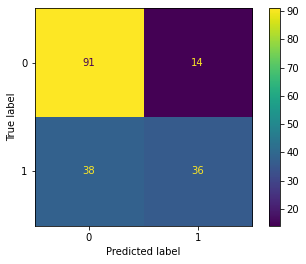

In [20]:
import matplotlib.pyplot as plt

# fig, ax = plt.figure(figsize=(12,8))
plot_confusion_matrix(knn, X_test, y_test, display_labels=['0', '1'])

Ilustração da matriz confusão.

In [21]:
df_limpo['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [22]:
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.71      0.87      0.78       105
           1       0.72      0.49      0.58        74

    accuracy                           0.71       179
   macro avg       0.71      0.68      0.68       179
weighted avg       0.71      0.71      0.70       179



Nosso modelo acertou a sobrevivencia de 7 em cada 10 tripulantes do návio o que é representado pela acurácia do modelo de 71%. O modelo KNN tem uma proporção de acertos dos positivos, que é representado pelo recall que são os TP/(TP + FN), de acordo com a matriz há maior acerto entre os tripulantes que não sobreviveram, e uma taxa bem menor para os não sobreviventes. Agora, a quantidade desses positivos que foram corretos são representados pela precisão do modelo que foi equilibrou (em 70%) entre as duas classificações. A media harmonica entre essas duas medidas (f1-score) pode nos dar um parametro importante para ser analisado junto com a acurácia.

Levando como parâmetro de julgamento a acurácia de 71% que não é satisfatória dados que nossos dados são em parte categóricos e o a taxa de precisão também não é ótima o que é reforçado pela média harmônica dos sobreviventes, com média harmônica de 58%, ou seja, há muito falso positivo (38 na matriz confusão). Com isso, fica evidênte que a exploração de novos modelos visando maximizar a acurácia e o f1-score se faz necessária dado que 71% de acuracy não satisfaz nossos requisitos. 

In [23]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dtree = DecisionTreeClassifier()

dtree.fit(X_train, y_train)

DecisionTreeClassifier()

Escolhemos esse modelo por ter mais possibilidade de filtragem dos dados, tendo em vista que temos muitos dados categóricos. 

In [24]:
print(classification_report(y_test, dtree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



Interpretando com base em 2 parâmetros: acuracy (80% ou 8 em 10) e f1-score (83% p/ ñs e 75% p/ s) é perceptivel uma alavancagem de 9% apenas com a mudança de modelo tal valor também é expressado pela média harmônica da precision e recall. O f1-score para 0 manteve a tendência do modelo passado, possivelmente devido ao alto volume de não sobreviventes em detrimento dos sobreviventes. Todavia, se faz necessário um nível maior de acurácia. No mínimo 90%, pois pensando em termos de aplicabilidade do modelo, um falso negativo ou positivo pode ser bem sério dado a classificação que se procura. Essas informações ficam mais visíveis na matriz confusão. 

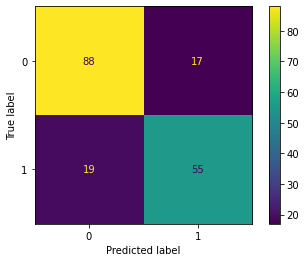

In [25]:
plot_confusion_matrix(dtree, X_test, y_test, display_labels=['0', '1'])

Ilustração da matriz confusão.

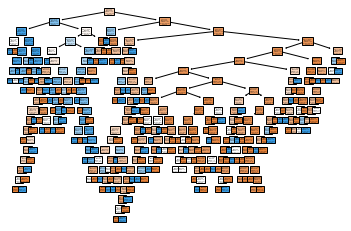

In [26]:
# visualize tree

plot_tree(dtree, feature_names=X_train.columns, class_names=['0', '1'], filled=True);

Ilustração da arvore de decisão, há muitos filtros então ela ficou bem extensa. 

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rf = RandomForestClassifier(n_estimators=1000, class_weight='balanced')

rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=1000)

Treinamento do modelo floresta aleatória que consiste em um método de classificação que é composto por várias árvores de decisão no treinamento do data set. Usamos este modelo com objetivo de máximizar a acurácia do modelo de árvores de decisões, uma vez que este usará n árvores para predição. 

In [ ]:
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      0.78      0.77       105
           1       0.67      0.64      0.65        74

    accuracy                           0.72       179
   macro avg       0.71      0.71      0.71       179
weighted avg       0.72      0.72      0.72       179



Interpretando nossa matriz, temos a capacidade de acerto diminuiu em relação ao modelo composto por apenas uma árvore de decisão. Por outro lado a média harmonica desse modelo que representa a capacidade de dizer sim quando é verdadeiro é maior que o modelo baseado por n vizinhos mais próximos. Como já dito anteriormente, esse nível de acurácia não satisfaz nossos requisitos de confiabilidade. Portanto, seguimos com a exploração de novos modelos. 

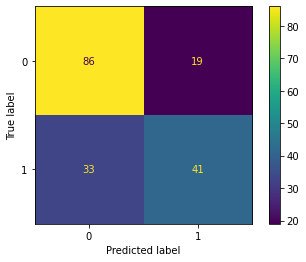

In [ ]:
plot_confusion_matrix(rf, X_test, y_test, display_labels=['0', '1'])

Como podemos ver na diagonal FT e FP, há uma quantidade similar de falsos positivos e negativos do modelo KNN.

In [ ]:
#regressao logistica

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Comparando a acurácia da regressão logistica com os modelos KNN e floresta aleátoria, não há diferenças substanciais. Exceto, do f1-score dos sobreviventes, foi a menor de todos os modelos testados até entao. Com base, nisso descartamos a regressão logística, por conta da acurácia não ser a esperada e um recall muito baixo, que tendeu a média negativamente em relação os demais modelos. 

In [ ]:
# feature importance

pd.DataFrame({'importances':rf.feature_importances_, 'features':X_train.columns})

,importances,features
0,0.088902,Pclass
1,0.000000,Sex
2,0.320364,Age
3,0.068329,SibSp
4,0.047748,Parch
5,0.390461,Fare
6,0.043793,Embarked
7,0.040403,Faixa Etarira


Plot do nível de importância de cada variável para classificação preditiva. Usado como apoio para escolha do próximo modelo. A idade e a tarifa paga foram eleitas com maior peso. Mas foi notado que algumas como faixa etaria e embarked podem estar viesando os dados do modelo KNN uma vez que este é baseado em classificação e distância entre os pontos. 

In [ ]:
df_limpo['Embarked']

PassengerId
1      1
2      2
3      1
4      1
5      1
      ..
887    1
888    1
889    1
890    2
891    3
Name: Embarked, Length: 891, dtype: int64

In [ ]:
df_limpo

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Faixa Etarira
PassengerId,,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,1,2
2,1,1,0,38.0,1,0,71.2833,2,3
3,1,3,0,26.0,0,0,7.9250,1,3
4,1,1,0,35.0,1,0,53.1000,1,3
5,0,3,0,35.0,0,0,8.0500,1,3
...,...,...,...,...,...,...,...,...,...
887,0,2,0,27.0,0,0,13.0000,1,3
888,1,1,0,19.0,0,0,30.0000,1,2
889,0,3,0,28.0,1,2,23.4500,1,3


Visualização. 

In [ ]:
categorical_cols = ['Embarked', 'SibSp', 'Parch', 'Faixa Etarira'] 

#import pandas as pd
df_limpo_dummies = pd.get_dummies(df_limpo, columns = categorical_cols)

Colocando as colunas que tinham dados numéricos que eram categóricos em variáveis por coluna e binárias, com isso objetiva-se aumentar a acurácia dos modelos baseados em disância como KNN. 

In [ ]:
df_limpo_dummies.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked_1', 'Embarked_2',
       'Embarked_3', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4',
       'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3',
       'Parch_4', 'Parch_5', 'Parch_6', 'Faixa Etarira_1', 'Faixa Etarira_2',
       'Faixa Etarira_3', 'Faixa Etarira_4'],
      dtype='object')

Visualização. 

In [ ]:
X_train_dummies, X_test_dummies, y_train_dummies, y_test_dummies = train_test_split(df_limpo_dummies.drop("Survived", 1), df_limpo_dummies['Survived'], test_size=0.2, random_state=42)

C:\Users\Admin\AppData\Local\Temp/ipykernel_8416/3428299666.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_train_dummies, X_test_dummies, y_train_dummies, y_test_dummies = train_test_split(df_limpo_dummies.drop("Survived", 1), df_limpo_dummies['Survived'], test_size=0.2, random_state=42)


In [ ]:
rf.fit(X_train_dummies, y_train_dummies)

RandomForestClassifier(class_weight='balanced', n_estimators=1000)

Treinando novamente, agora com data set atualizado. 

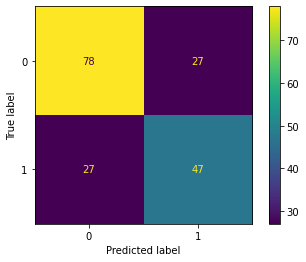

In [ ]:
plot_confusion_matrix(rf, X_test_dummies, y_test_dummies, display_labels=['0', '1'])

Após o ajuste dos dados houve um aumento expressivo nos resultados falsos. Possivelmente por conta do modelo ser baseado em n árvores aleatórias e o aumento da quantidade de colunas ter gerado resultados não esperados no treinamento. 

In [ ]:
print(classification_report(y_test_dummies, rf.predict(X_test_dummies)))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74       105
           1       0.64      0.64      0.64        74

    accuracy                           0.70       179
   macro avg       0.69      0.69      0.69       179
weighted avg       0.70      0.70      0.70       179



Visivlmente é notório que houve uma leve queda da acurácia do modelo e uma constância na precisão e recall do modelo. O que nos leva a adotar por oferta e demanda que o modelo de árvore de decisão é o mais apropriado paro o caso, dado que este tem 80% de acurácia em detrimento dos outros modelos que estão entorno de 70%. 

In [ ]:
# grid search
# random search

# hyperparameter tuning

# cross-validation (k-fold)